In [1]:
import pandas as pd

In [2]:
df_monday = pd.read_csv('data/monday.csv', sep=';', index_col=0)

df_tuesday = pd.read_csv('data/tuesday.csv', sep=';', index_col=0)

df_wednesday = pd.read_csv('data/wednesday.csv', sep=';', index_col=0)

df_thursday = pd.read_csv('data/thursday.csv', sep=';', index_col=0)

df_friday = pd.read_csv('data/friday.csv', sep=';', index_col=0)

In [3]:
# put together every dataframe for each day into one df
frames = [df_monday, df_tuesday, df_wednesday, df_thursday, df_friday]
df = pd.concat(frames)
df.head()

,customer_no,location
timestamp,,
2019-09-02 07:03:00,1,dairy
2019-09-02 07:03:00,2,dairy
2019-09-02 07:04:00,3,dairy
2019-09-02 07:04:00,4,dairy
2019-09-02 07:04:00,5,spices


In [4]:
df.index = pd.to_datetime(df.index)

In [5]:
# Calculate the total number of customers in each section
df.groupby('location').count()

,customer_no
location,
checkout,7417
dairy,4679
drinks,3905
fruit,5122
spices,3754


<AxesSubplot:xlabel='location'>

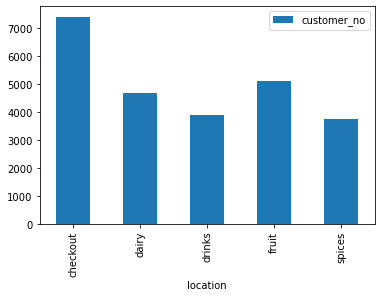

In [6]:
df.groupby('location').count().plot(kind='bar')

In [7]:
df['day'] = df.index.day
df.head()

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2


In [8]:
df.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:49:00', '2019-09-06 21:49:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00',
               '2019-09-06 21:50:00', '2019-09-06 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=24877, freq=None)

In [9]:
# Calculate the total number of customers in each section over time (here complete time)
df.groupby(['location', 'day']).count()
df

,customer_no,location,day
timestamp,,,
2019-09-02 07:03:00,1,dairy,2
2019-09-02 07:03:00,2,dairy,2
2019-09-02 07:04:00,3,dairy,2
2019-09-02 07:04:00,4,dairy,2
2019-09-02 07:04:00,5,spices,2
...,...,...,...
2019-09-06 21:50:00,1500,dairy,6
2019-09-06 21:50:00,1507,checkout,6
2019-09-06 21:50:00,1508,checkout,6


In [10]:
# Calculate the total number of customers in each section over time (here hourly)
df.groupby('location').resample('h').count()

customer_no  location  day
location timestamp                                      
checkout 2019-09-02 07:00:00           92        92   92
         2019-09-02 08:00:00          112       112  112
         2019-09-02 09:00:00           85        85   85
         2019-09-02 10:00:00           90        90   90
         2019-09-02 11:00:00           55        55   55
...                                   ...       ...  ...
spices   2019-09-06 17:00:00           65        65   65
         2019-09-06 18:00:00           98        98   98
         2019-09-06 19:00:00           65        65   65
         2019-09-06 20:00:00           54        54   54
         2019-09-06 21:00:00           20        20   20

[555 rows x 3 columns]

In [11]:
# Display the number of customers at checkout over time (here one day)
df[(df.location == 'checkout') & (df.day==2)].count()

customer_no    1437
location       1437
day            1437
dtype: int64

In [12]:
# Calculate the total number of customers in each section over time (here day)
df.groupby(['location', 'day']).count()

customer_no
location day             
checkout 2           1437
         3           1420
         4           1526
         5           1532
         6           1502
dairy    2            895
         3            911
         4            976
         5            965
         6            932
drinks   2            797
         3            713
         4            775
         5            776
         6            844
fruit    2           1005
         3            976
         4           1043
         5           1041
         6           1057
spices   2            750
         3            694
         4            730
         5            790
         6            790

<AxesSubplot:xlabel='location,day'>

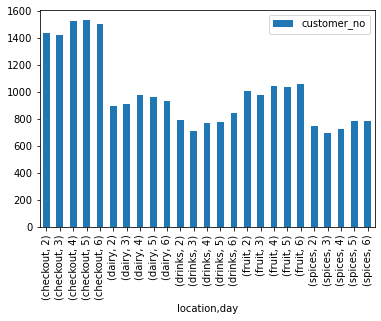

In [13]:
df.groupby(['location', 'day']).count().plot(kind='bar')

In [14]:
df.reset_index(inplace=True)
df

,timestamp,customer_no,location,day
0,2019-09-02 07:03:00,1,dairy,2
1,2019-09-02 07:03:00,2,dairy,2
2,2019-09-02 07:04:00,3,dairy,2
3,2019-09-02 07:04:00,4,dairy,2
4,2019-09-02 07:04:00,5,spices,2
...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,6
24873,2019-09-06 21:50:00,1507,checkout,6
24874,2019-09-06 21:50:00,1508,checkout,6
24875,2019-09-06 21:50:00,1509,drinks,6


In [15]:
df[df.location == 'checkout'].groupby(['day', 'timestamp'])[['customer_no']].count()

customer_no
day timestamp                       
2   2019-09-02 07:05:00            2
    2019-09-02 07:06:00            2
    2019-09-02 07:07:00            1
    2019-09-02 07:08:00            3
    2019-09-02 07:09:00            1
...                              ...
6   2019-09-06 21:37:00            1
    2019-09-06 21:45:00            1
    2019-09-06 21:47:00            2
    2019-09-06 21:48:00            2
    2019-09-06 21:50:00            2

[3460 rows x 1 columns]

In [16]:
# create new column 'time_spend'
df['time_spend'] = df.groupby(['day', 'customer_no'])['timestamp'].transform(lambda x : x.max()-x.min())

In [17]:
# convert the minutes into seconds
df['time_spend'] = df['time_spend'].dt.seconds

In [18]:
# find customers who were not checked-out
df[df['time_spend'] == 0]

,timestamp,customer_no,location,day,time_spend
4860,2019-09-02 21:46:00,1439,fruit,2,0
4881,2019-09-02 21:49:00,1445,dairy,2,0
4882,2019-09-02 21:50:00,1446,dairy,2,0
4883,2019-09-02 21:50:00,1447,fruit,2,0
19746,2019-09-05 21:48:00,1532,dairy,5,0
19747,2019-09-05 21:48:00,1533,dairy,5,0
24864,2019-09-06 21:48:00,1506,dairy,6,0
24875,2019-09-06 21:50:00,1509,drinks,6,0
24876,2019-09-06 21:50:00,1510,spices,6,0


In [20]:
# Calculate the time each customer spent in the market
df['time_spend']

0        120
1        180
2        120
3        240
4         60
        ... 
24872    540
24873    120
24874    120
24875      0
24876      0
Name: time_spend, Length: 24877, dtype: int64

In [94]:
# create a new column 'next location'
df['next_location'] = df.groupby(['day', 'customer_no'])['location'].shift(-1)


In [97]:
df.head(25)

,timestamp,customer_no,location,day,time_spend,next_location
0,2019-09-02 07:03:00,1,dairy,2,120,checkout
1,2019-09-02 07:03:00,2,dairy,2,180,checkout
2,2019-09-02 07:04:00,3,dairy,2,120,checkout
3,2019-09-02 07:04:00,4,dairy,2,240,checkout
4,2019-09-02 07:04:00,5,spices,2,60,checkout
5,2019-09-02 07:04:00,6,spices,2,1500,dairy
6,2019-09-02 07:04:00,7,spices,2,540,drinks
7,2019-09-02 07:04:00,8,fruit,2,180,checkout
8,2019-09-02 07:05:00,1,checkout,2,120,NaN
9,2019-09-02 07:05:00,5,checkout,2,60,NaN


In [99]:
df.next_location.fillna('checkout', inplace=True)

In [102]:
df.head(10)

,timestamp,customer_no,location,day,time_spend,next_location
0,2019-09-02 07:03:00,1,dairy,2,120,checkout
1,2019-09-02 07:03:00,2,dairy,2,180,checkout
2,2019-09-02 07:04:00,3,dairy,2,120,checkout
3,2019-09-02 07:04:00,4,dairy,2,240,checkout
4,2019-09-02 07:04:00,5,spices,2,60,checkout
5,2019-09-02 07:04:00,6,spices,2,1500,dairy
6,2019-09-02 07:04:00,7,spices,2,540,drinks
7,2019-09-02 07:04:00,8,fruit,2,180,checkout
8,2019-09-02 07:05:00,1,checkout,2,120,checkout
9,2019-09-02 07:05:00,5,checkout,2,60,checkout


In [119]:
transition_probes = pd.crosstab(df['location'], df['next_location'], normalize=0)


In [120]:
transition_probes

next_location,checkout,dairy,drinks,fruit,spices
location,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.393033,0.000000,0.222483,0.189357,0.195127
drinks,0.537260,0.027145,0.000000,0.218950,0.216645
fruit,0.500195,0.237993,0.136080,0.000000,0.125732
spices,0.251998,0.323122,0.272776,0.152104,0.000000


In [121]:
# all rows have to sum up to one

assert all(transition_probes.sum(axis=1) > 0.999)

In [222]:
class Customer:
       
    def __init__(self, name, state, transition_probes, budget=100):
        
        self.name = name
        self.state = state
        self.transition_probes = transition_probes
        self.budget = budget
        
    def __repr__(self):
        
        return f'<Customer {self.name} in {self.state}>'
    
    def next_state(self):
        
        '''
        Propagates the customer to the next state.
        Returns nothing.
        '''
        self.state = random.choices(transition_probes.columns, transition_probes.loc[self.state])[0]
        return self.state
        
        
    def is_active(self):
        
        if self.state != 'checkout':
            return True
        #else:
         #   return False
        

In [225]:
class Supermarket:
    """manages multiple Customer instances that are currently in the market.
    """

    def __init__(self, name):        
        # a list of Customer objects                  
        self.customers = []
        self.minutes = 0
        self.last_id = 0
        self.name = name
        # opens at 7
        # closes at 10


    def __repr__(self):
        return f'{self.name} supermarket at {self.get_time()} with {len(self.customers)} customers.'


    def get_time(self):
        """current time in HH:MM format,
        """
        hours = self.minutes // 60  # integer division
        minutes = self.minutes % 60 # remainder/ modulo
        return f'{hours:02d}:{minutes:02d}:00'


    def is_open(self):  
        # supermarket closes after 3hours    
        return self.minutes < 180


    def print_customers(self):
        """print all customers with the current time and id in CSV format.     
        """
        
        for customer in self.customers:
            
            print(f'{self.get_time()}, {customer.name}, {customer.state}')


    def next_minute(self):
        """propagates all customers to the next state.
        """
        self.minutes += 1
        # for every customer determine their next state
        for customer in self.customers:
            customer.next_state()
   

    def add_new_customers(self):
        """randomly creates new customers.
        """
        self.last_id += 1
        new_customer = Customer(self.last_id, random.choices(['fruit', 'dairy', 'drinks', 'spices'])[0], transition_probes)
        self.customers.append(new_customer)
        


    def remove_exitsting_customers(self):
        """removes every customer that is not active any more.
        """
        self.customers = [customer for customer in self.customers if customer.is_active()]
                
                
        
        # for each customer in the list
        
            # if the customer is not active then remove from list

In [226]:
lidl = Supermarket(name='LIDL')

while lidl.is_open():

    # increase the time of the supermarket by one minute
    lidl.next_minute()

    # remove churned customers from the supermarket
    lidl.remove_exitsting_customers()

    # generate new customers at their initial location
    lidl.add_new_customers()
    

    # repeat from step 1
    print(lidl.print_customers())

00:01:00, 1, drinks
None
00:02:00, 2, fruit
None
00:03:00, 2, drinks
00:03:00, 3, dairy
None
00:04:00, 2, fruit
00:04:00, 3, spices
00:04:00, 4, dairy
None
00:05:00, 2, dairy
00:05:00, 4, fruit
00:05:00, 5, dairy
None
00:06:00, 2, drinks
00:06:00, 4, dairy
00:06:00, 5, fruit
00:06:00, 6, dairy
None
00:07:00, 4, spices
00:07:00, 6, fruit
00:07:00, 7, dairy
None
00:08:00, 6, drinks
00:08:00, 8, dairy
None
00:09:00, 6, spices
00:09:00, 8, spices
00:09:00, 9, drinks
None
00:10:00, 6, drinks
00:10:00, 8, drinks
00:10:00, 10, dairy
None
00:11:00, 6, spices
00:11:00, 10, drinks
00:11:00, 11, drinks
None
00:12:00, 6, dairy
00:12:00, 12, fruit
None
00:13:00, 6, spices
00:13:00, 13, dairy
None
00:14:00, 13, spices
00:14:00, 14, dairy
None
00:15:00, 14, fruit
00:15:00, 15, spices
None
00:16:00, 15, dairy
00:16:00, 16, spices
None
00:17:00, 16, drinks
00:17:00, 17, dairy
None
00:18:00, 17, spices
00:18:00, 18, fruit
None
00:19:00, 17, fruit
00:19:00, 18, drinks
00:19:00, 19, dairy
None
00:20:00, 2

In [197]:
cust1 = Customer("Jake", "spices", transition_probes, 50)
cust1.next_state()

'drinks'

In [192]:
cust1.is_active()

True

In [152]:
states = random.choices(transition_probes.columns, transition_probes.loc['spices'])
#states = mood[0]
states

['checkout']

In [151]:
transition_probes.columns

Index(['checkout', 'dairy', 'drinks', 'fruit', 'spices'], dtype='object', name='next_location')

In [131]:
print(cust1.next_state())

None


In [124]:
cust1.state

'drinks'

In [109]:
cust1.is_active()

In [110]:
cust1 = Customer("Jake", "drinks", 50)
cust2 = Customer("Margaret", "spices")

In [111]:
print(cust1.name, cust1.state)
print(cust2.name, cust2.budget)

Jake drinks
Margaret 100


In [112]:
print(cust1)

<Customer Jake in drinks>


In [113]:
import random
print(cust1.next_state())

None


In [114]:
cust1.next_state()

In [115]:
cust1.state

'dairy'

In [ ]:
states = ['checkout', 'dairy', 'drinks', 'fruits', 'spices']

# a two dimensional matrix with 5 rows and 5 columns
P = np.array([
    [],
    [],
    [],
    []
 
])

P = pd.DataFrame(P, index=states, columns=states)
P